# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [9]:
print("RMSprop")

RMSprop


In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 15s 293us/step - loss: 2.3078 - accuracy: 0.0995 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 12s 249us/step - loss: 2.3079 - accuracy: 0.1000 - val_loss: 2.3227 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 14s 289us/step - loss: 2.3081 - accuracy: 0.1007 - val_loss: 2.3179 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 12s 232us/step - loss: 1.8166 - accuracy: 0.3363 - val_loss: 1.8414 - val_accuracy: 0.3418
Epoch 46/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.8142 - accuracy: 0.3358 - val_loss: 1.8902 - val_accuracy: 0.3154
Epoch 47/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.8138 - accuracy: 0.3364 - val_loss: 1.8144 - val_accuracy: 0.3289
Epoch 48/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.8133 - accuracy: 0.3344 - val_loss: 1.9327 - val_accuracy: 0.3025
Epoch 49/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.8134 - accuracy: 0.3364 - val_loss: 1.8204 - val_accuracy: 0.3326
Epoch 50/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.8111 - accuracy: 0.3371 - val_loss: 1.8612 - val_accuracy: 0.3181
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 12s 237us/step - loss: 0.8545 - accuracy: 0.6934 - val_loss: 1.6652 - val_accuracy: 0.4945
Epoch 43/50
50000/50000 [==============================] - 13s 250us/step - loss: 0.8408 - accuracy: 0.6991 - val_loss: 1.9786 - val_accuracy: 0.4662
Epoch 44/50
50000/50000 [==============================] - 12s 230us/step - loss: 0.8284 - accuracy: 0.7018 - val_loss: 1.7742 - val_accuracy: 0.4994
Epoch 45/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.8180 - accuracy: 0.7070 - val_loss: 1.7788 - val_accuracy: 0.5034
Epoch 46/50
50000/50000 [==============================] - 10s 208us/step - loss: 0.8015 - accuracy: 0.7122 - val_loss: 1.8350 - val_accuracy: 0.4689
Epoch 47/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.7899 - accuracy: 0.7174 - val_loss: 1.9969 - val_accuracy: 0.5012
Epoch 48/50
50000/50000 [==============================] - 14s 282us/step - loss: 0.7780 - accuracy: 0.7222 - va

50000/50000 [==============================] - 16s 314us/step - loss: 1.0570 - accuracy: 0.6337 - val_loss: 1.3837 - val_accuracy: 0.5212
Epoch 40/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.0487 - accuracy: 0.6359 - val_loss: 1.3325 - val_accuracy: 0.5324
Epoch 41/50
50000/50000 [==============================] - 19s 385us/step - loss: 1.0353 - accuracy: 0.6391 - val_loss: 1.4397 - val_accuracy: 0.5046
Epoch 42/50
50000/50000 [==============================] - 25s 504us/step - loss: 1.0228 - accuracy: 0.6432 - val_loss: 1.4549 - val_accuracy: 0.4999
Epoch 43/50
50000/50000 [==============================] - 19s 383us/step - loss: 1.0190 - accuracy: 0.6450 - val_loss: 1.4433 - val_accuracy: 0.4937
Epoch 44/50
50000/50000 [==============================] - 20s 402us/step - loss: 1.0057 - accuracy: 0.6510 - val_loss: 1.4450 - val_accuracy: 0.5083
Epoch 45/50
50000/50000 [==============================] - 17s 345us/step - loss: 0.9941 - accuracy: 0.6534 - va

50000/50000 [==============================] - 10s 208us/step - loss: 1.4617 - accuracy: 0.4899 - val_loss: 1.5084 - val_accuracy: 0.4706
Epoch 37/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.4567 - accuracy: 0.4933 - val_loss: 1.5060 - val_accuracy: 0.4682
Epoch 38/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.4513 - accuracy: 0.4961 - val_loss: 1.4965 - val_accuracy: 0.4730
Epoch 39/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.4460 - accuracy: 0.4965 - val_loss: 1.5117 - val_accuracy: 0.4644
Epoch 40/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.4421 - accuracy: 0.4982 - val_loss: 1.4971 - val_accuracy: 0.4682
Epoch 41/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.4360 - accuracy: 0.5007 - val_loss: 1.4975 - val_accuracy: 0.4699
Epoch 42/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.4314 - accuracy: 0.5016 - va

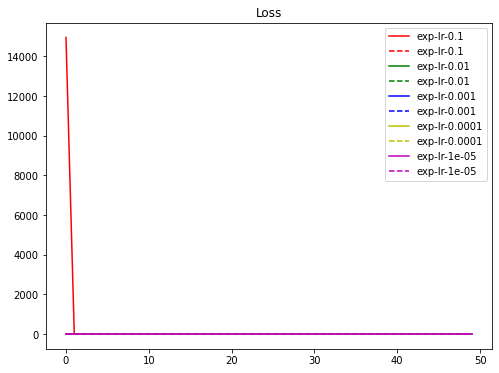

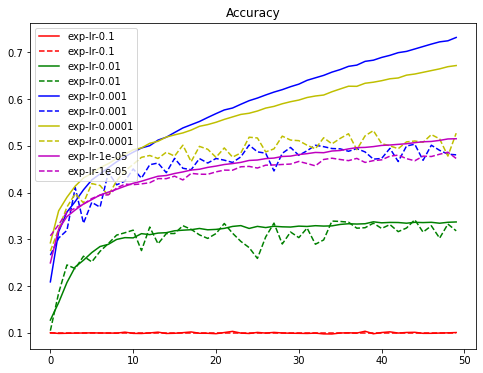

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [11]:
print("Adagrad")

Adagrad


In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 10s 192us/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 12s 249us/step - loss: 1.0886 - accuracy: 0.6205 - val_loss: 1.3943 - val_accuracy: 0.5143
Epoch 46/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.0811 - accuracy: 0.6227 - val_loss: 1.3745 - val_accuracy: 0.5249
Epoch 47/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.0734 - accuracy: 0.6246 - val_loss: 1.3802 - val_accuracy: 0.5210
Epoch 48/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.0651 - accuracy: 0.6286 - val_loss: 1.4089 - val_accuracy: 0.5124
Epoch 49/50
50000/50000 [==============================] - 15s 293us/step - loss: 1.0600 - accuracy: 0.6306 - val_loss: 1.4126 - val_accuracy: 0.5106
Epoch 50/50
50000/50000 [==============================] - 15s 296us/step - loss: 1.0547 - accuracy: 0.6337 - val_loss: 1.4806 - val_accuracy: 0.4967
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 27s 537us/step - loss: 1.2853 - accuracy: 0.5526 - val_loss: 1.4019 - val_accuracy: 0.5081
Epoch 43/50
50000/50000 [==============================] - 27s 540us/step - loss: 1.2805 - accuracy: 0.5533 - val_loss: 1.4147 - val_accuracy: 0.5024
Epoch 44/50
50000/50000 [==============================] - 27s 545us/step - loss: 1.2755 - accuracy: 0.5568 - val_loss: 1.3822 - val_accuracy: 0.5100
Epoch 45/50
50000/50000 [==============================] - 27s 538us/step - loss: 1.2709 - accuracy: 0.5567 - val_loss: 1.3945 - val_accuracy: 0.5101
Epoch 46/50
50000/50000 [==============================] - 27s 541us/step - loss: 1.2670 - accuracy: 0.5593 - val_loss: 1.3843 - val_accuracy: 0.5120
Epoch 47/50
50000/50000 [==============================] - 27s 540us/step - loss: 1.2630 - accuracy: 0.5634 - val_loss: 1.3896 - val_accuracy: 0.5114
Epoch 48/50
50000/50000 [==============================] - 27s 542us/step - loss: 1.2587 - accuracy: 0.5608 - va

50000/50000 [==============================] - 27s 536us/step - loss: 1.6620 - accuracy: 0.4264 - val_loss: 1.6697 - val_accuracy: 0.4217
Epoch 40/50
50000/50000 [==============================] - 27s 534us/step - loss: 1.6597 - accuracy: 0.4287 - val_loss: 1.6677 - val_accuracy: 0.4246
Epoch 41/50
50000/50000 [==============================] - 27s 535us/step - loss: 1.6575 - accuracy: 0.4289 - val_loss: 1.6657 - val_accuracy: 0.4226
Epoch 42/50
50000/50000 [==============================] - 27s 536us/step - loss: 1.6555 - accuracy: 0.4290 - val_loss: 1.6639 - val_accuracy: 0.4236
Epoch 43/50
50000/50000 [==============================] - 27s 537us/step - loss: 1.6535 - accuracy: 0.4308 - val_loss: 1.6621 - val_accuracy: 0.4218
Epoch 44/50
50000/50000 [==============================] - 27s 534us/step - loss: 1.6515 - accuracy: 0.4313 - val_loss: 1.6610 - val_accuracy: 0.4225
Epoch 45/50
50000/50000 [==============================] - 27s 547us/step - loss: 1.6496 - accuracy: 0.4318 - va

50000/50000 [==============================] - 11s 230us/step - loss: 2.0298 - accuracy: 0.2909 - val_loss: 2.0255 - val_accuracy: 0.2915
Epoch 37/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.0275 - accuracy: 0.2921 - val_loss: 2.0231 - val_accuracy: 0.2928
Epoch 38/50
50000/50000 [==============================] - 12s 233us/step - loss: 2.0252 - accuracy: 0.2925 - val_loss: 2.0209 - val_accuracy: 0.2945
Epoch 39/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.0230 - accuracy: 0.2935 - val_loss: 2.0187 - val_accuracy: 0.2956
Epoch 40/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.0208 - accuracy: 0.2949 - val_loss: 2.0165 - val_accuracy: 0.2961
Epoch 41/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.0187 - accuracy: 0.2954 - val_loss: 2.0144 - val_accuracy: 0.2978
Epoch 42/50
50000/50000 [==============================] - 11s 226us/step - loss: 2.0166 - accuracy: 0.2962 - va

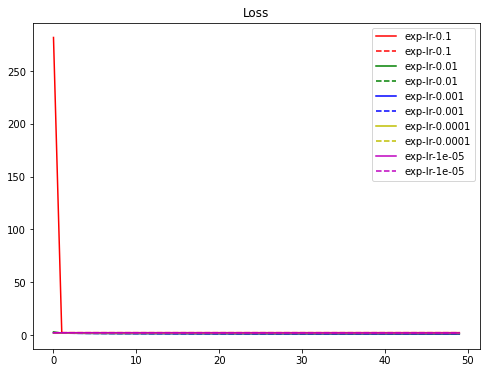

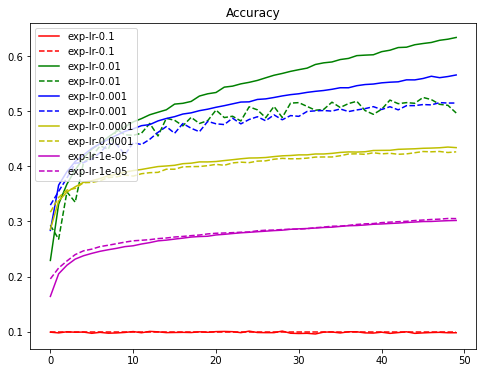

In [17]:
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [18]:
print("Adam")

Adam


In [19]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 31s 629us/step - loss: 2.3074 - accuracy: 0.0982 - val_loss: 2.3062 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 31s 623us/step - loss: 2.3064 - accuracy: 0.0979 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 31s 623us/step - loss: 2.3069 - accuracy: 0.0996 - val_loss: 2.3070 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 31s 623us/step - loss: 1.5089 - accuracy: 0.4621 - val_loss: 1.5778 - val_accuracy: 0.4415
Epoch 46/50
50000/50000 [==============================] - 31s 626us/step - loss: 1.4919 - accuracy: 0.4683 - val_loss: 1.6098 - val_accuracy: 0.4285
Epoch 47/50
50000/50000 [==============================] - 31s 624us/step - loss: 1.4940 - accuracy: 0.4653 - val_loss: 1.6337 - val_accuracy: 0.4173
Epoch 48/50
50000/50000 [==============================] - 31s 627us/step - loss: 1.5057 - accuracy: 0.4597 - val_loss: 1.6712 - val_accuracy: 0.4036
Epoch 49/50
50000/50000 [==============================] - 32s 649us/step - loss: 1.5016 - accuracy: 0.4625 - val_loss: 1.5487 - val_accuracy: 0.4499
Epoch 50/50
50000/50000 [==============================] - 31s 630us/step - loss: 1.4897 - accuracy: 0.4669 - val_loss: 1.5954 - val_accuracy: 0.4272
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 11s 223us/step - loss: 0.7369 - accuracy: 0.7341 - val_loss: 1.6868 - val_accuracy: 0.5194
Epoch 43/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.7291 - accuracy: 0.7365 - val_loss: 1.6608 - val_accuracy: 0.5213
Epoch 44/50
50000/50000 [==============================] - 13s 251us/step - loss: 0.7101 - accuracy: 0.7466 - val_loss: 1.7253 - val_accuracy: 0.5178
Epoch 45/50
50000/50000 [==============================] - 13s 267us/step - loss: 0.6926 - accuracy: 0.7530 - val_loss: 1.7558 - val_accuracy: 0.5074
Epoch 46/50
50000/50000 [==============================] - 14s 278us/step - loss: 0.6888 - accuracy: 0.7537 - val_loss: 1.7497 - val_accuracy: 0.5114
Epoch 47/50
50000/50000 [==============================] - 14s 289us/step - loss: 0.6634 - accuracy: 0.7635 - val_loss: 1.7554 - val_accuracy: 0.5219
Epoch 48/50
50000/50000 [==============================] - 15s 298us/step - loss: 0.6435 - accuracy: 0.7696 - va

50000/50000 [==============================] - 16s 314us/step - loss: 0.9329 - accuracy: 0.6775 - val_loss: 1.3411 - val_accuracy: 0.5381
Epoch 40/50
50000/50000 [==============================] - 17s 337us/step - loss: 0.9217 - accuracy: 0.6795 - val_loss: 1.3198 - val_accuracy: 0.5393
Epoch 41/50
50000/50000 [==============================] - 17s 334us/step - loss: 0.9140 - accuracy: 0.6846 - val_loss: 1.4236 - val_accuracy: 0.5199
Epoch 42/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.9050 - accuracy: 0.6856 - val_loss: 1.3427 - val_accuracy: 0.5352
Epoch 43/50
50000/50000 [==============================] - 24s 479us/step - loss: 0.8932 - accuracy: 0.6912 - val_loss: 1.3261 - val_accuracy: 0.5493
Epoch 44/50
50000/50000 [==============================] - 23s 461us/step - loss: 0.8788 - accuracy: 0.6966 - val_loss: 1.3387 - val_accuracy: 0.5497
Epoch 45/50
50000/50000 [==============================] - 19s 389us/step - loss: 0.8716 - accuracy: 0.6982 - va

50000/50000 [==============================] - 18s 367us/step - loss: 1.4350 - accuracy: 0.5018 - val_loss: 1.4749 - val_accuracy: 0.4827
Epoch 37/50
50000/50000 [==============================] - 18s 360us/step - loss: 1.4288 - accuracy: 0.5060 - val_loss: 1.4725 - val_accuracy: 0.4861
Epoch 38/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.4228 - accuracy: 0.5082 - val_loss: 1.4700 - val_accuracy: 0.4839
Epoch 39/50
50000/50000 [==============================] - 18s 366us/step - loss: 1.4183 - accuracy: 0.5081 - val_loss: 1.4668 - val_accuracy: 0.4863
Epoch 40/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.4120 - accuracy: 0.5113 - val_loss: 1.4605 - val_accuracy: 0.4884
Epoch 41/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.4077 - accuracy: 0.5120 - val_loss: 1.4574 - val_accuracy: 0.4870
Epoch 42/50
50000/50000 [==============================] - 18s 360us/step - loss: 1.4024 - accuracy: 0.5148 - va

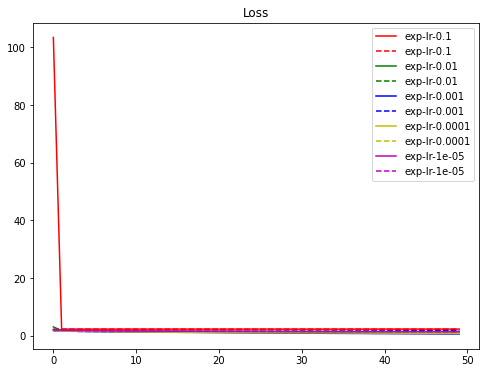

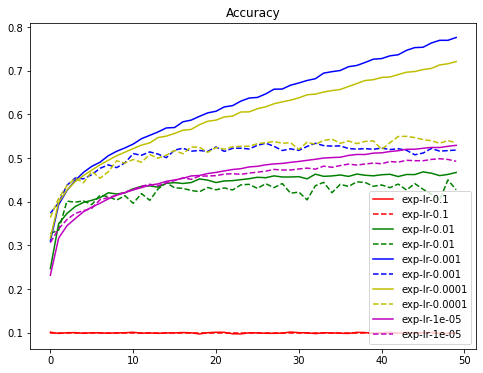

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()